<a href="https://colab.research.google.com/github/georgiastuart/WeTeach_Python/blob/main/MNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [34]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

In [35]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [36]:
normalized_train_data = train_data.astype('float32') / 255
normalized_test_data = test_data.astype('float32') / 255
np.max(normalized_train_data)

1.0

In [37]:
one_hot_train_labels = tf.one_hot(train_labels, 10)
one_hot_train_labels

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [38]:
def build_ff_model():
  model = keras.Sequential([
                            Dense(16, activation=tf.nn.relu, input_shape=(28 * 28,)),
                            Dense(16),
                            Dense(10)
  ])

  model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae', 'mse'])
  return model

In [39]:
reshaped_training_data = normalized_train_data.reshape((normalized_train_data.shape[0], 28 * 28))
print(reshaped_training_data.shape)

(60000, 784)


In [40]:
model = build_ff_model()
history = model.fit(reshaped_training_data, one_hot_train_labels, epochs=100, validation_split=0.1, verbose=0)

In [41]:
reshaped_test_data = normalized_test_data.reshape((normalized_test_data.shape[0], 28 * 28))
one_hot_test_labels = tf.one_hot(test_labels, 10)

In [43]:
predicted_data = model.predict(reshaped_test_data)

In [45]:
predicted_data.shape

(10000, 10)

In [52]:
predicted_labels = np.argmax(predicted_data, axis=1)


In [51]:
print(predicted_indices)
print(test_labels)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [56]:
print(np.sum(predicted_indices == test_labels) / len(predicted_indices))

0.9299


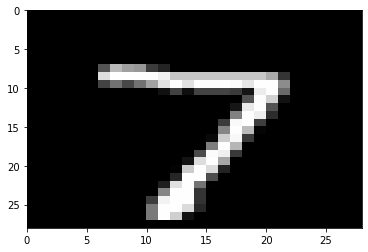

In [62]:
plt.pcolormesh(test_data[0], cmap='gray')
plt.gca().invert_yaxis()

In [67]:
result_0 = model.predict(test_data[0].flatten().reshape(1, 28 * 28))
np.argmax(result_0)

7